In [2]:
import cv2
import imutils
import matplotlib.pyplot as plt
import os
import numpy as np

In [3]:
def load_images(data_dir):
    
    # two lists, labels and images.
    index = []
    images = []
   
    file_names = [os.path.join(data_dir, f)
                      for f in os.listdir(data_dir)
                      if f.endswith(".jpg")]
    for f in file_names:
            images.append(cv2.imread(f))
    return images

In [4]:
def afficher_images(images):
    fig=plt.figure(figsize=(20,10))
    for i in range(len(images)):
        fig.add_subplot(1,len(images),i+1)
        plt.axis('off')
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.show()

In [14]:
def afficher_image(images):
  plt.axis('off')
  plt.imshow(cv2.cvtColor(images, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
###########PARTIE 1##############

In [6]:
images = load_images("/home/fahd/INDEXATION/X/TP2/test/")
img_ref = cv2.imread("/home/fahd/INDEXATION/X/TP2/ref.jpg")

Image de reference : 



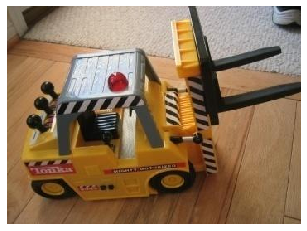

Images de test : 



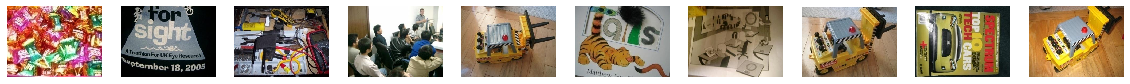

In [7]:
print("Image de reference : \n")
afficher_image(img_ref)
print("Images de test : \n")
afficher_images(images)

In [13]:
import cv2 as cv
MIN_MATCH_COUNT = 10

# Initiate SIFT detector
sift = cv.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img_ref,None)


for img2 in images :
  kp2, des2 = sift.detectAndCompute(img2,None)

  FLANN_INDEX_KDTREE = 1

  index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
  search_params = dict(checks = 50)

  flann = cv.FlannBasedMatcher(index_params, search_params)
  matches = flann.knnMatch(des1,des2,k=2)

  # store all the good matches as per Lowe's ratio test.
  good = []
  for m,n in matches:
      if m.distance < 0.7*n.distance:
          good.append(m)

  if len(good)>MIN_MATCH_COUNT:
      src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
      dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
      img_res = cv2.drawMatches(img_ref,kp1,img2,kp2,good,None,flags=2)
      afficher_image(img_res)

error: OpenCV(4.2.0) /io/opencv_contrib/modules/xfeatures2d/src/sift.cpp:1210: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'


In [ ]:
###########PARTIE 2##############

In [9]:
import cv2 as cv
MIN_MATCH_COUNT = 10

# Initiate SURF detector
surf = cv.xfeatures2d.SURF_create()
# find the keypoints and descriptors with SURF
kp1, des1 = surf.detectAndCompute(img_ref,None)


for img2 in images :
  kp2, des2 = surf.detectAndCompute(img2,None)

  FLANN_INDEX_KDTREE = 1

  index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
  search_params = dict(checks = 50)

  flann = cv.FlannBasedMatcher(index_params, search_params)
  matches = flann.knnMatch(des1,des2,k=2)

  # store all the good matches as per Lowe's ratio test.
  good = []
  for m,n in matches:
      if m.distance < 0.65*n.distance:
          good.append(m)

  if len(good)>MIN_MATCH_COUNT:
      src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
      dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
      img_res = cv2.drawMatches(img_ref,kp1,img2,kp2,good,None,flags=2)
      afficher_image(img_res)

      

error: OpenCV(4.2.0) /io/opencv_contrib/modules/xfeatures2d/src/surf.cpp:1029: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'


#Le detecteur ORB

Ce qui est bien par rapport a l'ORB c'est qu'il est OpenSource
et il donne des resultat similaire a SURF et SIFT


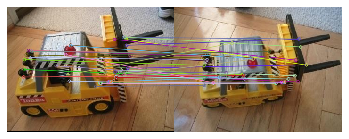

In [10]:
# Initiate SURF detector
orb = cv2.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img_ref,None)


for img2 in images :
  kp2, des2 = orb.detectAndCompute(img2,None)

  # Brute Force Matching
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
  matches = bf.match(des1, des2)
  matches = sorted(matches, key = lambda x:x.distance)


  if matches[0].distance <= 30 :
     
      img_res = cv2.drawMatches(img_ref,kp1,img2,kp2,matches[:40],None,flags=2)
      afficher_image(img_res)
